In [1]:
include("../src/SpinonStructure.jl")
include("../src/BZMath.jl")


using .BZmath
using .SpinonStructure
using StaticArrays
using SparseArrays
using LinearAlgebra
using BenchmarkTools


In [2]:
?construct_landau_gauge

search: construct_landau_gauge



function construct*landau*gauge(lattice::geom.PyroPrimitive, α) Input: primitive lattice, and a field gradient α α should be a 3 x 4 matrix such that  A*μ (I*i e*i ) = I*i α_iμ Output: A, a (V,4) matrix contianing the gauge fields


In [34]:
lat = geom.PyroPrimitive(4,5,6)

function ncells(lat::geom.PyroPrimitive)
    return lat.L[1]*lat.L[2]*lat.L[3]
end

print(ncells(lat))

sim = SimulationParameters("0flux",
    lattice= lat,
    # A=construct_landau_gauge(lat, 2π/5 * [ 1 0 0 0; 2 4 0 1; 1 1 0 3 ] ) ,
    A = rand(ncells(lat), 4),
    #A=zeros(ncells(lat),4),
    Jpm=-0.001,
    B=[0.,0.,0.],
    n_samples=10000
    )
cmp = SpinonStructure.CompiledHamiltonian(sim)

calc_fluxes(sim)

120

120×4 Matrix{Float64}:
 -0.0594552  -0.463275   -0.126958    0.649688
 -0.588375    0.613022    0.199766   -0.224413
 -0.172575   -0.736562    0.811967    0.0971694
 -0.0777543  -0.801551   -0.813981    1.69329
 -0.999937    0.400712    0.680028   -0.0808029
  1.42593     0.0467855  -0.797768   -0.674945
  1.22261    -0.14003    -0.738295   -0.344285
 -0.0964919   0.200722    0.411044   -0.515275
  0.683251   -0.667683   -0.689188    0.67362
  0.718866   -0.644442    0.52341    -0.597833
  0.508364   -1.6884      0.873928    0.306106
  0.0367066   0.325527   -0.234566   -0.127668
 -1.12028     1.27302    -0.695275    0.542535
  ⋮                                  
  0.846559    0.108856   -1.19219     0.236774
  1.14794    -0.588943    1.19338    -1.75237
 -0.440064    0.134502    0.509383   -0.203821
 -1.11365     0.0361329   1.14063    -0.063117
  0.485344   -0.318536   -0.161691   -0.005117
 -0.618972   -0.060093    1.18914    -0.510074
 -0.932094    0.950421    1.00171    -1.02004
 

In [35]:
Q = SVector{3}(1.,2.,3.)
# Q = SVector{3}(0.,0,0)

M = Matrix(SpinonStructure.calc_hopping(cmp,Q))

240×240 Matrix{ComplexF64}:
          0.0+0.0im          …           0.0+0.0im
 -0.000240971-6.65806e-5im               0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im                      0.0+0.0im
 -0.000111475+0.000223771im  …           0.0+0.0im
   0.00024504-4.95509e-5im               0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im          …           0.0+0.0im
   9.37724e-5-0.000231747im              0.0+0.0im
          0.0+0.0im                      0.0+0.0im
             ⋮               ⋱  
          0.0+0.0im              0.000172386+0.000181061im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im          …           0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0+0.0im                      0.0+0.0im
          0.0

In [36]:
function assert_sym(M)

    N = ncells(lat)
    
    MA = M[1:N,1:N]
    MB = M[N+1:2N,N+1:2N]
    @assert norm(M[1:N,N+1:2N]) < 1e-15
    @assert norm(M[N+1:2N,1:N]) < 1e-15
    @assert norm(eigvals(MB) - eigvals(MA)) < 1e-15
end

    

assert_sym (generic function with 2 methods)

In [37]:
assert_sym(M)

In [38]:
eigvals(MB) - eigvals(MA)

27-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

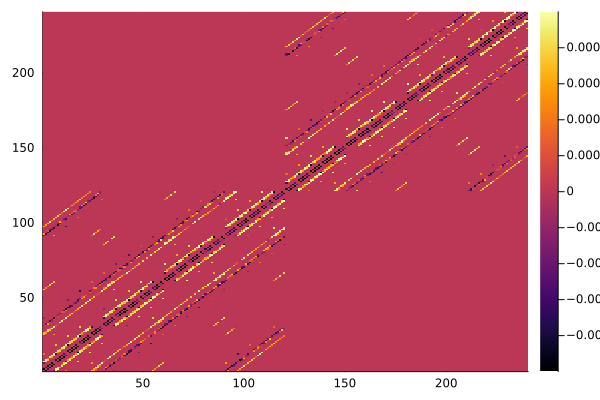

In [39]:
using Plots
heatmap(real.(M))

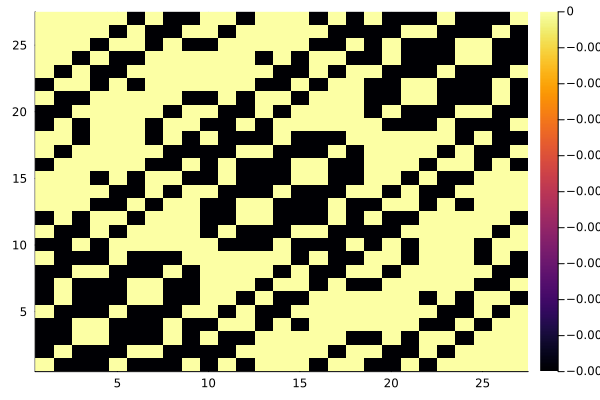

In [40]:
heatmap(real.(MA))

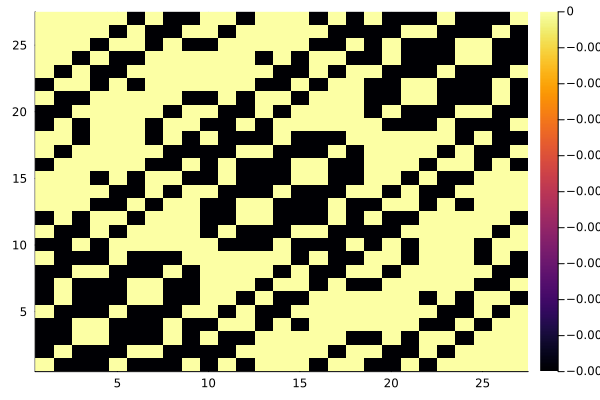

In [41]:
heatmap(real.(MB))

In [13]:
size(M)

(54, 54)

In [14]:
54/2

27.0